In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 1. Exploratory Data Analysis

## 1.1 Load Data

In [2]:
df0 = pd.read_excel('data-input.xlsx')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emiten                   45 non-null     object 
 1   PER (X)                  45 non-null     float64
 2   PBV (X)                  45 non-null     float64
 3   EV/EBTIDA (X)            45 non-null     float64
 4   BVPS                     45 non-null     float64
 5   ROA                      45 non-null     float64
 6   ROE                      45 non-null     float64
 7   DER (X)                  45 non-null     float64
 8   Sales Growth             45 non-null     float64
 9   Operating Income Growth  45 non-null     float64
 10  Net Income Growth        45 non-null     float64
 11  Gross Profit Margin      45 non-null     float64
 12  Operating Profit Margin  45 non-null     float64
 13  Net Profit Margin        45 non-null     float64
 14  Category                 0 n

In [3]:
df0.describe()

,PER (X),PBV (X),EV/EBTIDA (X),BVPS,ROA,ROE,DER (X),Sales Growth,Operating Income Growth,Net Income Growth,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Category
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,0.0
mean,641.078889,2.727556,97.108444,1159.454444,0.433778,1.104889,5.258889,-3.417778,-371.584222,-227.788667,53.412000,2.076667,-1.685111,NaN
std,3740.224139,5.599890,135.313482,1662.990493,2.403191,11.180555,3.059188,22.386981,1408.938069,1293.734668,20.111519,34.082144,33.191648,NaN
min,-246.260000,0.310000,-262.020000,61.230000,-8.700000,-38.460000,0.190000,-42.650000,-6836.920000,-8100.150000,4.870000,-161.230000,-164.560000,NaN
25%,9.040000,0.770000,42.430000,200.890000,0.140000,0.500000,3.450000,-13.410000,-50.160000,-72.990000,41.380000,1.930000,0.960000,NaN
50%,28.520000,1.440000,68.660000,350.840000,0.630000,2.320000,5.160000,-4.380000,-19.660000,-31.490000,56.510000,8.030000,4.710000,NaN
75%,88.920000,2.490000,132.580000,1300.020000,1.540000,7.050000,6.510000,3.070000,25.350000,31.650000,68.780000,18.290000,12.740000,NaN
max,25145.430000,37.880000,513.780000,7567.650000,6.840000,16.520000,16.080000,98.550000,346.610000,1655.360000,87.740000,46.490000,36.180000,NaN


## 1.2 Data Cleansing

In [3]:
df0.drop(["EMITEN","Minority Interest","Cash From Financing Act","Category"], axis=1, inplace=True)

## 1.3 Scatter Plot

<Figure size 1080x1080 with 0 Axes>

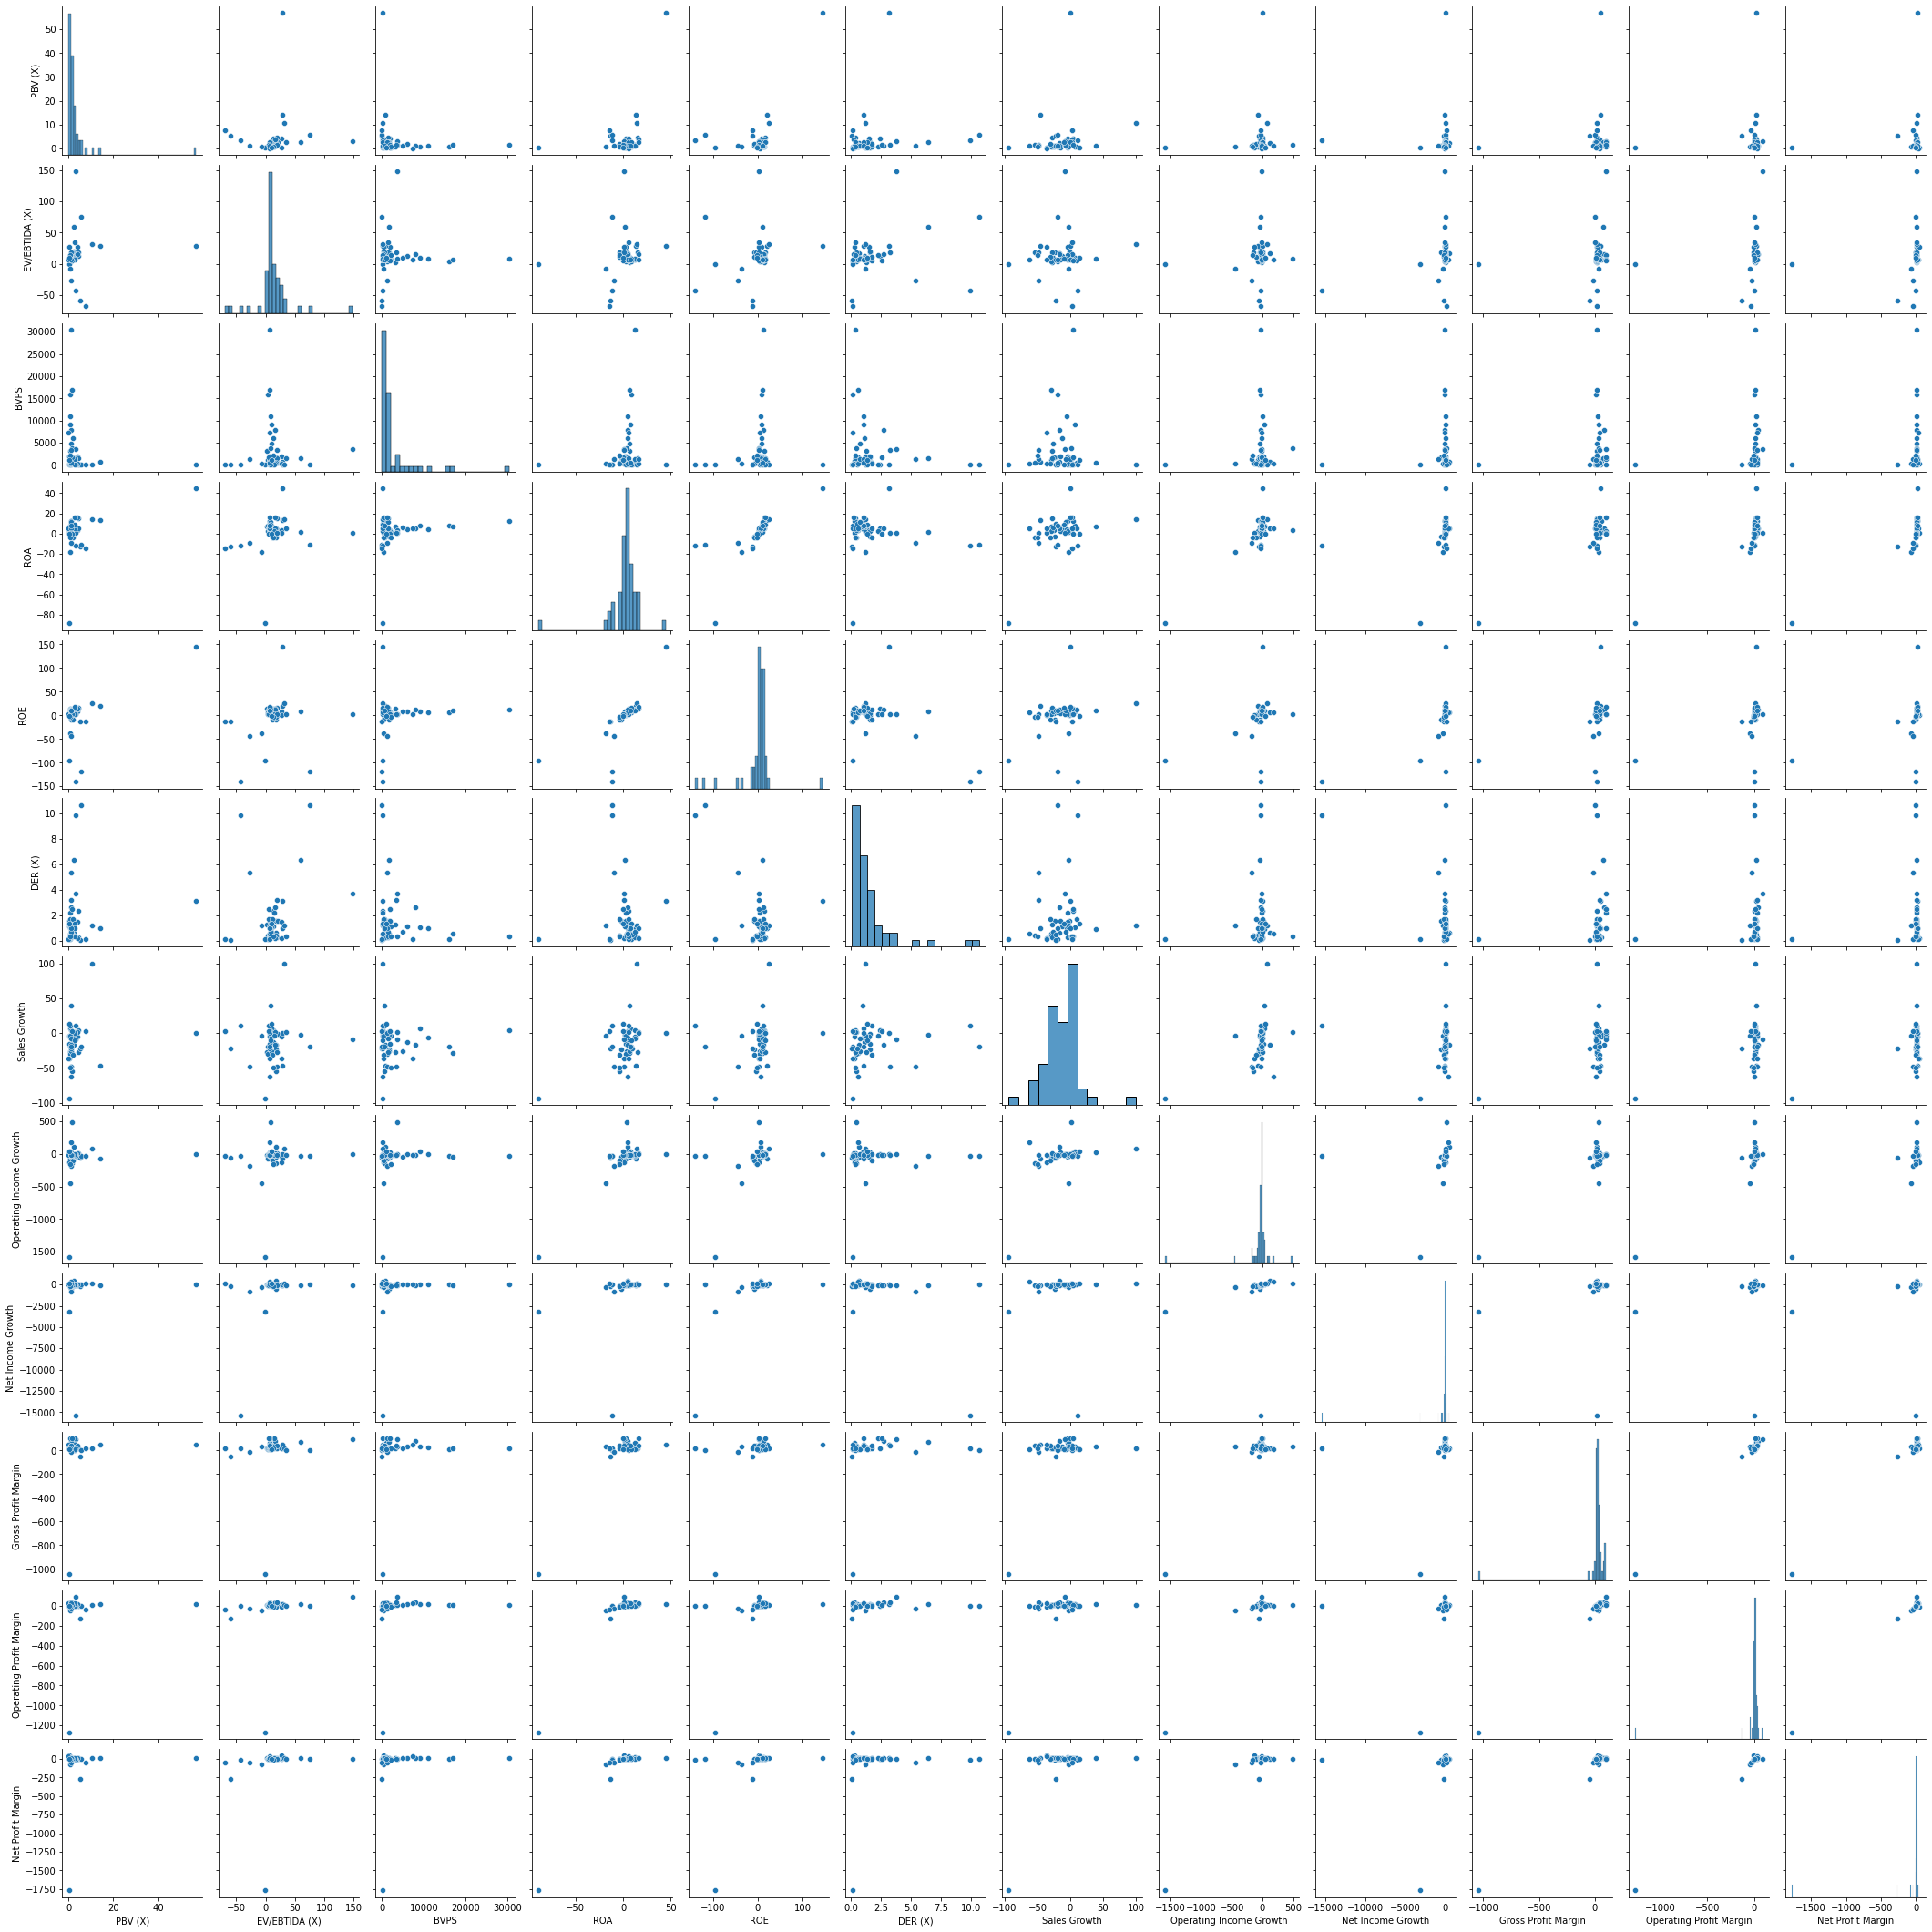

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# 2. Clustering

## 2.1 Load Data

In [2]:
df0 = pd.read_excel('data-input.xlsx')
df1 = df0[['DER (X)','Operating Profit Margin','Sales Growth','Category']]
df1.describe()

,DER (X),Operating Profit Margin,Sales Growth,Category
count,45.000000,45.000000,45.000000,0.0
mean,5.258889,2.076667,-3.417778,NaN
std,3.059188,34.082144,22.386981,NaN
min,0.190000,-161.230000,-42.650000,NaN
25%,3.450000,1.930000,-13.410000,NaN
50%,5.160000,8.030000,-4.380000,NaN
75%,6.510000,18.290000,3.070000,NaN
max,16.080000,46.490000,98.550000,NaN


<AxesSubplot:xlabel='Emiten', ylabel='Operating Profit Margin'>

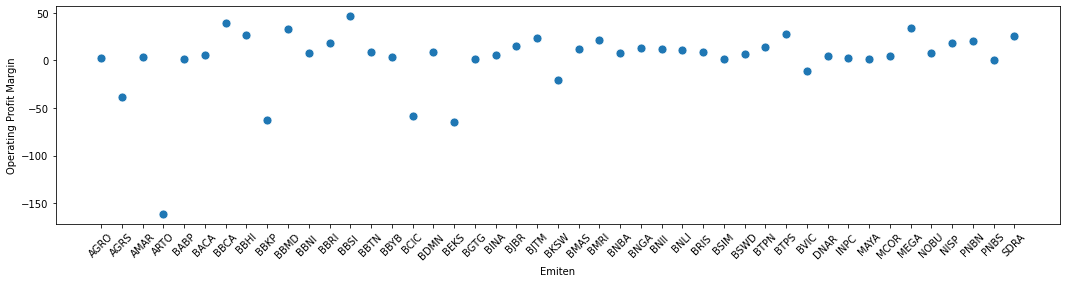

In [3]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='DER (X)'>

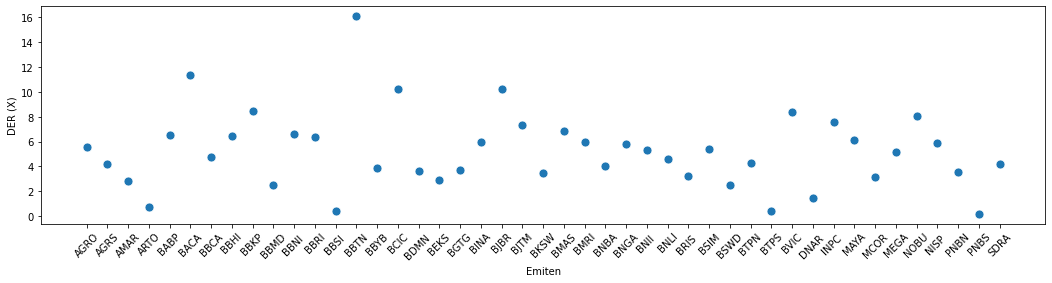

In [4]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='DER (X)', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='Sales Growth'>

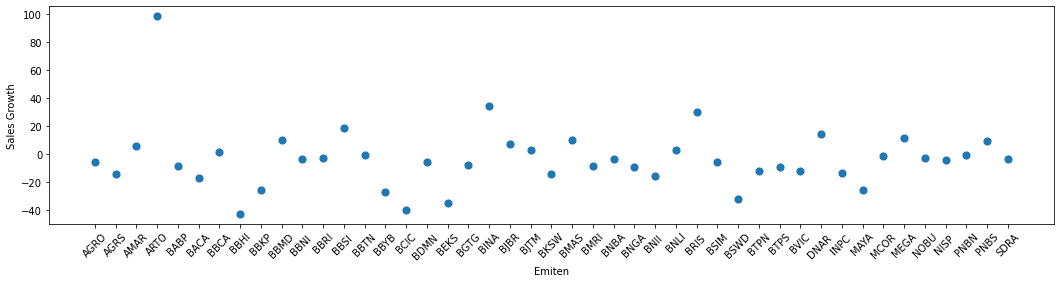

In [5]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Sales Growth', 
                data=df0, s=80)

## 2.2 Outlier

In [6]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 45
Jumlah baris setelah memfilter outlier: 44


In [7]:
df1.describe()

,DER (X),Operating Profit Margin,Sales Growth,Category
count,44.000000,44.000000,44.000000,0.0
mean,5.360909,5.788182,-5.735227,NaN
std,3.016126,23.543572,16.295278,NaN
min,0.190000,-64.920000,-42.650000,NaN
25%,3.555000,2.267500,-13.575000,NaN
50%,5.260000,8.050000,-4.965000,NaN
75%,6.535000,18.435000,2.807500,NaN
max,16.080000,46.490000,34.730000,NaN


## 2.3 Standardisasi Fitur

In [8]:
feats = ['DER (X)','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER (X),Operating Profit Margin,Sales Growth
count,4.400000e+01,4.400000e+01,4.400000e+01
mean,1.375163e-16,-2.018587e-17,-5.677277e-17
std,1.011561e+00,1.011561e+00,1.011561e+00
min,-1.734242e+00,-3.038012e+00,-2.291556e+00
25%,-6.056735e-01,-1.512678e-01,-4.866692e-01
50%,-3.384332e-02,9.718013e-02,4.781336e-02
75%,3.937716e-01,5.433767e-01,5.303064e-01
max,3.595015e+00,1.748774e+00,2.511958e+00


## 2.4 Lakukan K-means

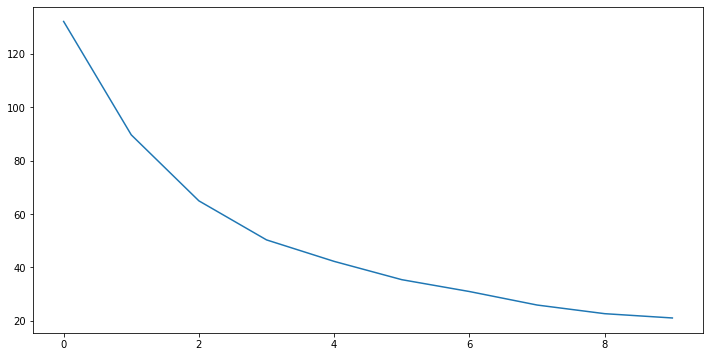

In [9]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)

## 2.5 Pilih Jumlah Cluster

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [11]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

## 2.6 Plot Cluster

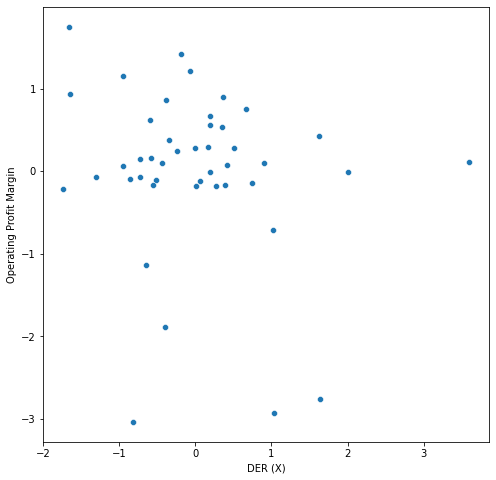

In [12]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER (X)', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [13]:
new_df.head(5)

,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,0.056710,-0.124951,-0.010849,NaN,4
1,-0.392705,-1.890403,-0.532296,NaN,0
2,-0.858889,-0.096165,0.721659,NaN,1
3,0.385387,-0.165769,-0.177836,NaN,4
4,2.001939,-0.005507,-0.691213,NaN,2


Assign `fit` to `Category` to create correct colour indicator

In [14]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,3,0.056710,-0.124951,-0.010849,NaN,4
1,2,-0.392705,-1.890403,-0.532296,NaN,0
2,4,-0.858889,-0.096165,0.721659,NaN,1
3,3,0.385387,-0.165769,-0.177836,NaN,4
4,1,2.001939,-0.005507,-0.691213,NaN,2


Adjust column name to `(St.)` = Standardized

In [15]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       44 non-null     int32  
 1   DER (St.)                      44 non-null     float64
 2   Operating Profit Margin (St.)  44 non-null     float64
 3   Sales Growth (St.)             44 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 1.3 KB


### 2.6.1 3D Scatter Plot

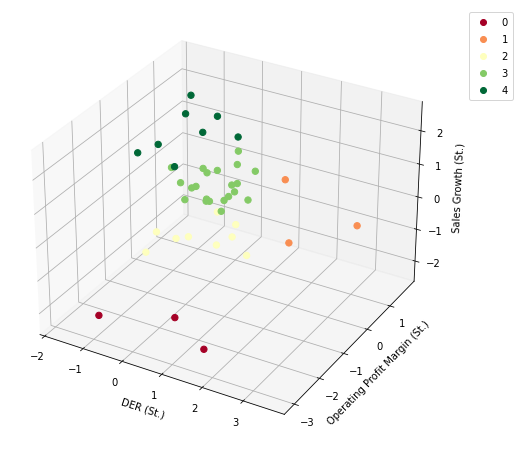

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 2.6.2 X vs Z View

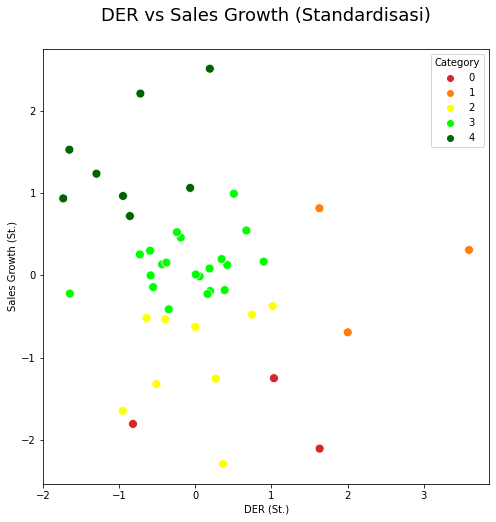

In [17]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.3 Y vs Z View

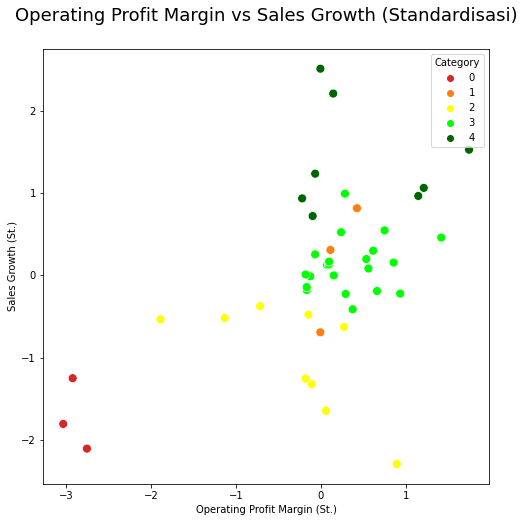

In [18]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.4 X vs Y View

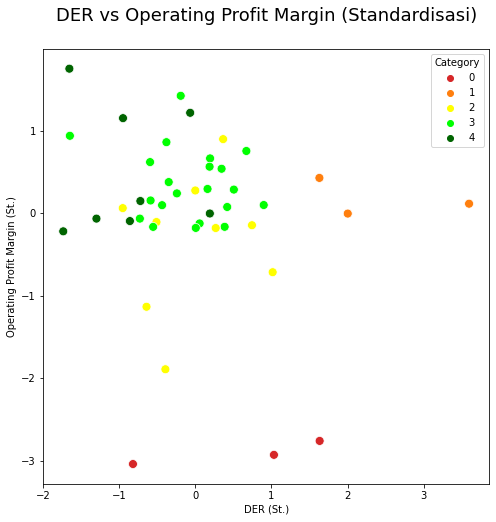

In [19]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3. Export Result

Adjust <b>Initial Data</b> `df0`:<br>
Delete outlier `YELO` and other column other than `Emiten`, `DER`,`Operating Profit Margin`,`Sales Growth`.

In [20]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emiten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         "PER (X)",
          "PBV (X)",
          "EV/EBTIDA (X)",
          "BVPS",
          "ROA",
          "ROE",
          "Operating Income Growth",
          "Net Income Growth",
          "Gross Profit Margin",
          "Net Profit Margin",
         ], axis=1, inplace=True)

Concat <b>Industry Emiten List</b> `dftemp`, <b>Result</b> `new_df` and <b>Initial Data</b> `df0`

In [21]:
dftemp = pd.read_excel('industry-emiten-list.xlsx')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industri,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emiten,DER (X),Sales Growth,Operating Profit Margin
0,Banking,Bank Rakyat Indonesia Agroniaga Tbk.,3.0,0.056710,-0.124951,-0.010849,AGRO,5.53,-5.91,2.88
1,Banking,Bank IBK Indonesia Tbk.,2.0,-0.392705,-1.890403,-0.532296,AGRS,4.19,-14.31,-38.21
2,Banking,Bank Amar Indonesia Tbk.,4.0,-0.858889,-0.096165,0.721659,AMAR,2.80,5.89,3.55
3,Banking,Bank Jago Tbk.,3.0,0.385387,-0.165769,-0.177836,BABP,6.51,-8.60,1.93
4,Banking,Bank MNC Internasional Tbk.,1.0,2.001939,-0.005507,-0.691213,BACA,11.33,-16.87,5.66


In [22]:
df.to_excel('result.xlsx', index = False)

# 4. Get Centroid

In [23]:
kmeans.cluster_centers_

array([[-0.01148437, -0.32703247, -1.00401153],
       [-0.88655785,  0.48403065,  1.39659022],
       [ 2.40887217,  0.17824168,  0.14496378],
       [ 0.61568423, -2.90768299, -1.71900001],
       [-0.08942129,  0.34568433,  0.12311861]])

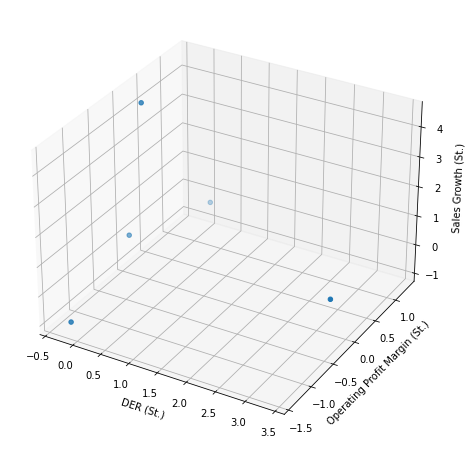

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# 5. Cluster Description

In [25]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.0,-0.886558,0.484031,1.396590,2.717500,16.762500,17.053750
std,0.0,0.690810,0.762074,0.645032,2.059756,10.390849,17.736891
min,4.0,-1.734242,-0.220335,0.721659,0.190000,5.890000,0.660000
25%,4.0,-1.387119,-0.073930,0.958172,1.225000,9.700000,4.067500
50%,4.0,-0.904166,0.070971,1.149990,2.665000,12.790000,7.440000
75%,4.0,-0.557881,1.166054,1.698439,3.697500,21.625000,32.927500
max,4.0,0.190864,1.748774,2.511958,5.930000,34.730000,46.490000


In [26]:
#Positively Impacted
df[df['Category'] == 3].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,3.0,-0.089421,0.345684,0.123119,5.094286,-3.751905,13.833810
std,0.0,0.578293,0.426313,0.324092,1.724270,5.220803,9.922222
min,3.0,-1.647042,-0.179088,-0.411246,0.450000,-12.360000,1.620000
25%,3.0,-0.436304,0.074408,-0.141832,4.060000,-8.020000,7.520000
50%,3.0,0.006403,0.284939,0.127582,5.380000,-3.680000,12.420000
75%,3.0,0.345141,0.617922,0.255461,6.390000,-1.620000,20.170000
max,3.0,0.898525,1.420517,0.993556,8.040000,10.270000,38.850000


In [27]:
#Neutral Impacted
df[df['Category'] == 2].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.0,-0.011484,-0.327032,-1.004012,5.326667,-21.908889,-1.823333
std,0.0,0.663608,0.818176,0.662414,1.978649,10.670860,19.042624
min,2.0,-0.952796,-1.890403,-2.291556,2.520000,-42.650000,-38.210000
25%,2.0,-0.510089,-0.715297,-1.320673,3.840000,-27.010000,-10.860000
50%,2.0,-0.000305,-0.146434,-0.625411,5.360000,-15.810000,2.380000
75%,2.0,0.365264,0.060659,-0.517397,6.450000,-14.070000,7.200000
max,2.0,1.015909,0.895909,-0.373379,8.390000,-11.750000,26.640000


In [28]:
#Negatively Impacted
df[df['Category'] == 1].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.0,2.408872,0.178242,0.144964,12.543333,-3.400000,9.936667
std,0.0,1.043958,0.222968,0.767267,3.112721,12.359931,5.189473
min,1.0,1.629663,-0.005507,-0.691213,10.220000,-16.870000,5.660000
25%,1.0,1.815801,0.054215,-0.190873,10.775000,-8.810000,7.050000
50%,1.0,2.001939,0.113937,0.309468,11.330000,-0.750000,8.440000
75%,1.0,2.798477,0.270116,0.563052,13.705000,3.335000,12.075000
max,1.0,3.595015,0.426296,0.816636,16.080000,7.420000,15.710000


In [29]:
#Highly Negatively Impacted
df[df['Category'] == 0].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.0,0.615684,-2.907683,-1.719000,7.196667,-33.426667,-61.886667
std,0.0,1.277917,0.140822,0.434036,3.810306,6.991898,3.277565
min,0.0,-0.818643,-3.038012,-2.104084,2.920000,-39.630000,-64.920000
25%,0.0,0.107018,-2.982371,-1.954168,5.680000,-37.215000,-63.625000
50%,0.0,1.032679,-2.926731,-1.804252,8.440000,-34.800000,-62.330000
75%,0.0,1.332848,-2.842519,-1.526458,9.335000,-30.325000,-60.370000
max,0.0,1.633017,-2.758306,-1.248664,10.230000,-25.850000,-58.410000
